# Invatare nesupervizata si preprocesare (1)

Invatare nesupervizata: pentru valori de intrare nu se cunosc valori de iesire cu care sa fie asociate. 

Exemple de cazuri de invatare nesupervizata:
1. Clustering - gruparea automata a datelor in mod nesupervizat: k-means, DBSCAN, OPTICS, clustering ierarhic etc.
1. Detectarea de anomalii sau one-class classification
1. Analiza de asocieri
1. Extragerea de trasaturi, reducerea de dimensiuni: Principal Component Analysis (PCA), Singular Values Decomposition, autoencoders, t-SNE

Unii autori includ si preprocesarea datelor de intrare in categoria invatarii nesupervizate. 

O problema legata de invatarea nesupervizata este cuantificarea succesului algoritmului: cum poti spune daca un clustering este sau nu reusit? cum poti determina daca un sistem a invatat bine sa detecteze anomaliile? etc. Tehnicile de instruire nesupervizata sunt folosite mai frecvent in analiza exploratorie si ca pas de preprocesare in instruire supervizata.

![Ambiguitate clustere](./images/clustering_ambiguitate.png)

## Preprocesarea 

In [1]:
%matplotlib inline
from preamble import *
plt.rcParams['image.cmap'] = "gray"

**Standardizarea**, obtinuta in scikit learn prin `StandardScaler`: pentru fiecare trasatura (feature), media devine 0 si abaterea standard (standard deviation) e 1; minimul si maximul pot fi oricat, dar sansa de a gasi un esantioane departate de medie devine tot mai mica pe masura ce se indeparteaza de medie. Fiecare trasatura e procesata independent fata de celelalte. 

**Scalarea robusta** prin `RobustScaler` similar cu `StandardScaler`, dar in loc de medie se foloseste mediana, in loc de varianță se folosesc prima si a treia quartila. Mediana: valoare fata de care jumatate din datele din setul initial sunt mai mici, iar cealalta jumatate - mai mari. Prima quartila e numarul fata de care un sfert din valorile din setul initial sunt mai mici, celelalte 3 sferturi - mai mari; similar a treia quartila. Prima quartila, mediana, a treia quartila sunt respectiv a 25-a, a 50-a, a 75-a quantila. Fata de standardizare, unde valorile outlier influenteaza media si abaterea standard, procesarea pe baza de mediana si quantila e mai robusta. Fiecare trasatura e procesata independent fata de celelalte. 

**Scalarea min-max**, obtinuta prin `MinMaxScaler`, scaleaza valorile intre un min si un max specificate, de regula 0 si respectiv 1. Fiecare trasatura e procesata independent fata de celelalte. 

**Normalizarea**, obtinuta prin `Normalizer`, asigura ca lungimea intr-o anumita norma este 1. Normele suportate in sklearn sunt: norma $L_1$ ,$L_2$, $max$. Pentru norma $L_2$, valorile sunt aduse astfel incat sa fie pe o hiper-sfera centrata in origine. Valorile de norma $L_1$ constanta sunt puncte pe un patrat centrat in origine, precum in figura de mai jos:
![constant l1 norm](./images/constant_l1_norm.png)
Normalizarea se obtine foarte simplu: daca se doreste ca fiecare vector sa aiba norma $k$, se imparte fiecare vector la norma sa si se inmulteste cu $k$. Normalizarea se face atunci cand conteaza directia pe care o au vectorii, nu lungimea lor. Similaritatea intre doi vectori normati la 1 poate fi calculata cu cosinusul unghiului lor, 
$$
\cos\left(\widehat{\mathbf{a}, \mathbf{b}}\right) = \mathbf{a} \cdot \mathbf{b}
$$

Reprezentarile de mai jos arata niste date, in forma originara si procesate prin cele 4 tehnici.

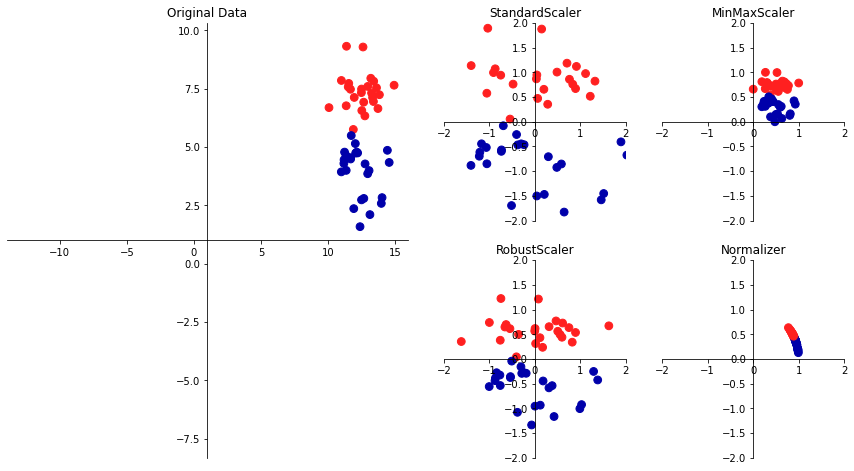

In [2]:
mglearn.plots.plot_scaling()

Aplicam operatiile pe set de date de tip benchmark.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


Scalarea (si in general preprocesarea de date in sklearn) se face prin:
1. instantierea clasei de preprocesare, `MinMaxScaler`;
1. apelul metodei `fit` pe setul de date de antrenare; 
1. apelul metodei `transform` pentru orice set de date: antrenare, validare, testare.

Setul de testare se presupune necunoscut la etapa de antrenare, nu poate fi deci referit. Este o eroare a fi folosit in etapa de antrenare, pentru ca se presupune ca apare 'information leak' din setul de testare, permitand cuiva sa genereze un preprocesator, un model sau un pipeline  care speculeaza ceea ce se afla din setul de testare. 

In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

Dupa `fit`, preprocesatorul *'invata'* care sunt valorile minime si maxime pentru setul de date furnizat; acestea devin stare a obiectului `MinMaxScaler`.

In [5]:
print(f'Min=\n{scaler.data_min_}\nMax=\n{scaler.data_max_}')

Min=
[  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
Max=
[  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]


Punctul 3 de mai sus se obtine prin:

In [6]:
X_train_scaled = scaler.transform(X_train)
assert X_train.shape == X_train_scaled.shape
print('For training dataset:')
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

For training dataset:
per-feature minimum before scaling:
 [  6.981   9.71   43.79  143.5     0.053   0.019   0.      0.      0.106
   0.05    0.115   0.36    0.757   6.802   0.002   0.002   0.      0.
   0.01    0.001   7.93   12.02   50.41  185.2     0.071   0.027   0.
   0.      0.157   0.055]
per-feature maximum before scaling:
 [  28.11    39.28   188.5   2501.       0.163    0.287    0.427    0.201
    0.304    0.096    2.873    4.885   21.98   542.2      0.031    0.135
    0.396    0.053    0.061    0.03    36.04    49.54   251.2   4254.
    0.223    0.938    1.17     0.291    0.577    0.149]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


De multe ori e mai eficienta apelarea in cascada a operatiilor de `fit_transform` pentru un set de date, daca setul originar nu mai e necesar:

In [7]:
X_train_copy = X_train.copy() # pastrez setul X_train originar pentru acest notebook
X_train_copy = scaler.fit_transform(X_train_copy)

Frecvent, asemenea operatii de preprocesare sunt inversabile, permitand recuperarea valorilor de dinaintea preprocesarii. In aceste cazuri metoda `inverse_transform` este disponibila:

In [8]:
# recuperarea datelor se face prin:
X_orig = scaler.inverse_transform(X_train_copy)
assert np.all(np.isclose(X_orig, X_train))

Setul de testare trebuie si el transformat cu acelasi obiect de preprocesare. Este insa posibil ca valorile de min si max sa nu mai fie exact 0 si 1, dar ar trebui sa fie apropiate de ele - altfel inseamna ca setul de test provine dintr-o distributie diferita:

In [9]:
# transforma setul de test
X_test_scaled = scaler.transform(X_test)
print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling:
[ 0.034  0.023  0.031  0.011  0.141  0.044  0.     0.     0.154 -0.006
 -0.001  0.006  0.004  0.001  0.039  0.011  0.     0.    -0.032  0.007
  0.027  0.058  0.02   0.009  0.109  0.026  0.     0.    -0.    -0.002]
per-feature maximum after scaling:
[0.958 0.815 0.956 0.894 0.811 1.22  0.88  0.933 0.932 1.037 0.427 0.498
 0.441 0.284 0.487 0.739 0.767 0.629 1.337 0.391 0.896 0.793 0.849 0.745
 0.915 1.132 1.07  0.924 1.205 1.631]


Retinem ca in sklearn API-ul e similar pentru diversi algoritmi de preprocesare, exceptand, desigur, apelul de constructor:

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# calling fit and transform in sequence (using method chaining)
X_scaled = scaler.fit(X_train).transform(X_train)
# same result, but more efficient computation
X_scaled_d = scaler.fit_transform(X_train)

### Efectul preprocesarii pentru instruirea supervizata

Efectul preprocesarii este destul de frecvent benefic, daca nu cumva e chiar impus de logica modelelor de clasificare sau regresie:

In [11]:
from sklearn.svm import SVC # model de clasificare bazat pe support vector machines

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)

svm = SVC(C=100, gamma='auto')
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


Acelasi set de date, dar trecut prin scalare 0-1:

In [12]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    svm.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.97


...sau trecut prin standardizare:

In [13]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


## Reducerea dimensiunilor, extragerea de trasaturi, invatarea varietatilor

### Analiza componentelor principale (Principal Component Analysis, PCA)

Resurse recomandate:
1. Introduction to Machine Learning with Python, pag 140+
1. [Jonathon Shlens, A Tutorial on Principal Component Analysis](https://arxiv.org/pdf/1404.1100.pdf) pentru exemple si suport matematic
1. [Lindsay I Smith, A tutorial on Principal Components Analysis](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf), exemplu si flux de lucru detaliat, aplicatii
1. [Eigenvectors and Eigenvalues](http://setosa.io/ev/eigenvectors-and-eigenvalues/), exemple, reprezentari grafice

PCA este o transformare liniara a datelor (deplasare, rotire) in asa fel incat in noul sistem de coordonate, trasaturile sa fie necorelate. Transformarea se bazeaza pe o schimbare de baza. 

Frecvent (dar nu obligatoriu) in cadrul PCA se face si reducerea dimensiunilor, prin renuntarea la componente pe care varianța e mica. 

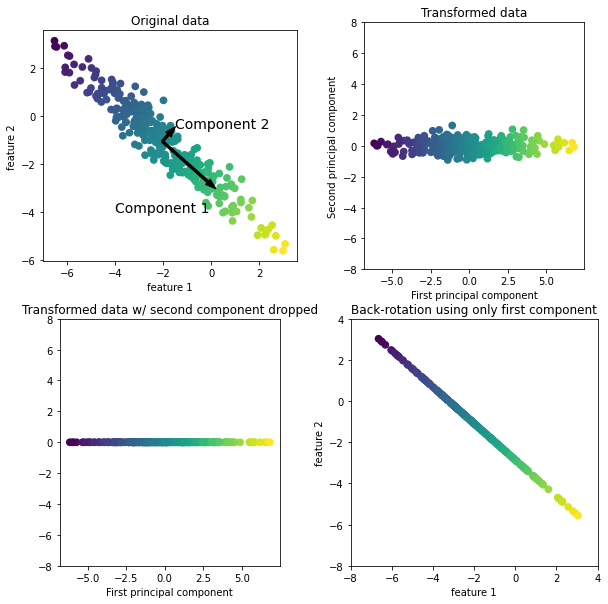

In [14]:
mglearn.plots.plot_pca_illustration()

### Motivatie: reducerea numarului de trasaturi

<img src='./images/motivation_ng.png' width='400px' />

2 trasaturi reprezinta dimensiunea unui obiect, exprimata in inci si centimetri. Evident, este o redundanta pe care vrem sa o eliminam - nu doar pentru ca reducem din cantitatea de memorie necesara, ci si din cauza ca anumite tehnici (metoda algebrica pentru regresia liniara) au de suferit cand matricea este neiversabila, sau alte tehnici (Naive Bayes) au pierdere de performanta cand se face overcounting pe trasaturi. 

Pentru exemplul de mai sus, vrem ca fiecare pereche de valori $(x_1, x_2)$ sa fie redusa la una singura. Acest lucru se obtine prin schimbarea sistemului de axe printr-o rotatie (si se obtin doua axe, una de-a lungul dreptei de regresie, cealalta perpendiculara pe aceasta), apoi renuntarea la una din ele (cea pe care varianța este mica). Faptul ca norul de puncte din figura de mai sus nu e perfect aliniat cu o dreapta este explicabil prin erorile de masurare inerente culegerii de date. 

In alte cazuri, cele doua dimensiuni $x_1$ si $x_2$ pot fi corelate liniar, iar una din ele poate poate fi estimata pe baza celeilalte. Din nou, are sens eliminarea redundantei - o redundanta liniara, in acest caz. 



### Exemplu de motivare: vizualizare

Intelegerea datelor favorizeaza alegerea adecvata a algoritmilor de instruire. Prin PCA se poate determina un sistem de reprezentare a datelor in mai putine dimensiuni, omiterea altora nealterand semnificativ continutul informational. Se poate ajunge la reprezentare 2d sau 3d care sa dea o vedere generala si intelegere asupra fenomenului studiat si sa dirijeze alegerea algoritmilor de invatare.

### Elemente de statistica

Pentru cele ce urmeaza e nevoie de urmatoarele cantitati statistice:
1. Media unui set de valori: pentru $\mathbf{X}=(X_1, X_2, \dots, X_n)$, media se calculeaza ca
$$
\overline{\mathbf{X}} = \frac{\sum\limits_{i=1}^n X_i}{n}
$$
1. abaterea standard (standard deviation): pentru vectorul $\mathbf{X}$ anterior se calculeaza ca
$$
s = \sqrt{\frac{\sum\limits_{i=1}^n(X_i - \overline{X})^2}{n-1}}
$$
unde numitorul $(n-1)$ se foloseste pentru a calcula abaterea standard pentru un esantion din intreaga populatie de valori; este asa numita [corectie Bessel](https://en.wikipedia.org/wiki/Bessel%27s_correction)
1. Varianta sau dispersia (variance) este patratul abaterii standard:
$$
s^2 = \frac{\sum\limits_{i=1}^n(X_i - \overline{X})^2}{n-1}
$$
1. Covarianta se masoara pentru perechi de vectori, arata in ce masura un vector $\mathbf{X}$ este liniar dependent de un alt vector $\mathbf{Y}=(Y_1, Y_2, \dots, Y_n)$:
$$
cov(\mathbf{X}, \mathbf{Y}) = \frac{\sum\limits_{i=1}^n (X_i - \overline{X})(Y_i - \overline{Y})}{n-1} = cov(\mathbf{Y}, \mathbf{X})
$$
1. Matricea de covarianta: pentru $m$ vectori $\mathbf{X}_1, \dots, \mathbf{X}_m$ matricea de covarianta este o matrice simetrica $\mathbf{C} \in \mathbb{R}^{n \times n}$, unde $c_{ij} = cov(\mathbf{X}_i, \mathbf{X}_j)$

### Elemente de algebra liniara

Exemplu: pentru o matrice ca mai jos:
$$
\begin{pmatrix}
2 & 3 \\
2 & 1
\end{pmatrix}
$$
avem ca:
$$
\begin{pmatrix}
2 & 3 \\
2 & 1
\end{pmatrix} 
\times
\begin{pmatrix}
3\\
2
\end{pmatrix}
=
4 \times 
\begin{pmatrix}
3\\
2
\end{pmatrix}
$$ 
deci un caz de forma $A \cdot v = \lambda v$. Vectorii $v$ si valorile asociate $\lambda$ pentru care $A \cdot v = \lambda v$ se numesc vectori si valori proprii ai matricei $A$ (eng: eigenvectors, eigenvalues). Daca $v$ e un vector propriu al lui $A$, atunci si $\alpha v$ e de asemenea vector propriu: $A \cdot (\alpha v) = \lambda (\alpha v)$. Se prefera vectorii proprii normati, deci pentru care $\| v\|_2 = 1$.

Se arata in algebra liniara ca vectorii proprii ai unei matrice sunt ortogonali (iar daca sunt normati, atunci ortonormati). 

Pasii pentru PCA pe un set de date sunt:
1. Se preia matricea de valori, in care o coloana este o dimensiune (trasatura).
1. Din fiecare trasatura (dimensiune) se scade valoarea medie. In acest fel, setul de valori pe fiecare trasatura va avea media 0. 
1. Se calculeaza matricea de covarianta.
1. Se calculeaza vectorii si valorile proprii. Vectorii proprii vor forma un nou sistem de axe.
1. Se formeaza un nou vector de trasaturi, in sistemul de axe de la punctul anterior
1. (Optional) Se pastreaza doar o parte din dimensiunile (trasaturile) din noul sistem = pasul de reducere a numarului de dimensiuni

**1. Se preia matricea de valori, in care o coloana este o dimensiune (trasatura).**

Pornim de la matricea:

In [15]:
data = np.array([[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], 
              [2.3, 2.7], [2, 1.6], [1, 1.1], [1.5, 1.6], [1.1, 0.9]])
orig_data = data.copy()
data

array([[2.5, 2.4],
       [0.5, 0.7],
       [2.2, 2.9],
       [1.9, 2.2],
       [3.1, 3. ],
       [2.3, 2.7],
       [2. , 1.6],
       [1. , 1.1],
       [1.5, 1.6],
       [1.1, 0.9]])

(-1.0, 4.0)

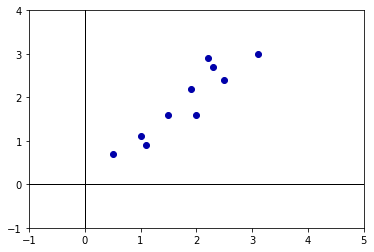

In [16]:
plt.scatter(data[:, 0], data[:, 1])
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.xlim((-1, 5))
plt.ylim((-1, 4))

**2. Din fiecare trasatura (dimensiune) se scade valoarea medie. In acest fel, setul de valori pe fiecare trasatura va avea media 0.**

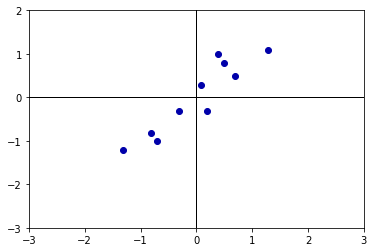

In [17]:
mu = np.mean(data, axis=0)
data = data - mu
plt.scatter(data[:, 0], data[:, 1])
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.xlim((-3, 3))
plt.ylim((-3, 2));

**3. Se calculeaza matricea de covarianta.**

In [18]:
C = np.cov(data.T)
print(f'Covariance matrix=\n{C}')

Covariance matrix=
[[0.617 0.615]
 [0.615 0.717]]


Faptul ca in afara diagonalelor avem valoare pozitiva arata ca valorile de pe o trasatura au aceeasi monotonie ca valorile de pe cealalta trasatura: cand valoarea de pe o dimensiune creste, creste si valoarea asociata de pe cealalta dimensiune.

**4. Se calculeaza vectorii si valorile proprii. Vectorii proprii vor forma un nou sistem de axe.**

+

**5. Se formeaza un nou vector de trasaturi, in sistemul de axe de la punctul anterior**

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(C)
print(f'Valorile proprii: \n{eigenvalues}')
print(f'Vectorii proprii: \n{eigenvectors}')

Valorile proprii: 
[0.049 1.284]
Vectorii proprii: 
[[-0.735 -0.678]
 [ 0.678 -0.735]]


Vectorii proprii sunt coloanele matricei $eigenvectors$.

Se prefera ca vectorii proprii sa fie sortati dupa valorile proprii, in ordine descrescatoare:

In [20]:
sort_order = np.argsort(eigenvalues)[::-1]
print(f'sort_order={sort_order}')
eigenvalues = eigenvalues[sort_order]
eigenvectors = eigenvectors[:, sort_order]
print(f'Valorile proprii: \n{eigenvalues}')
print(f'Vectorii proprii: \n{eigenvectors}')

sort_order=[1 0]
Valorile proprii: 
[1.284 0.049]
Vectorii proprii: 
[[-0.678 -0.735]
 [-0.735  0.678]]


Vectorii proprii sunt deja ortonormati in biblioteca `numpy`:

In [21]:
assert np.isclose(1, np.linalg.norm(eigenvectors[:, 0]))
assert np.isclose(1, np.linalg.norm(eigenvectors[:, 1]))
assert np.isclose(0, np.dot(eigenvectors[:, 0], eigenvectors[:, 1]))
# pe scurt, toate cele 3 asserturi anterioare sunt echivalente cu:
assert np.all(np.isclose(np.eye(2), eigenvectors @ eigenvectors.T))

Valorile initiale se proiecteaza pe noul sistem de axe cu operatia: 
$$
projected\_data = data \cdot eigenvectors
$$

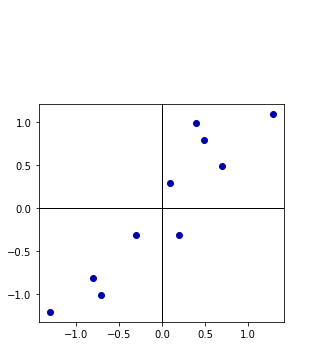

In [22]:
#  resursa: https://stackoverflow.com/questions/18299523/basic-example-for-pca-with-matplotlib

projected_data = np.dot(data, eigenvectors)
sigma = projected_data.std(axis=0).mean()
fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1])
for axis in eigenvectors: # iterare pe coloane
    start, end = mu, mu + sigma * axis
    ax.annotate(
        '', xy=end, xycoords='data',
        xytext=start, textcoords='data',
        arrowprops=dict(facecolor='red', width=2.0))
ax.set_aspect('equal')
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')
plt.show()

Datele proiectate pe noul sistem de axe sunt:

In [23]:
projected_data

array([[-0.828, -0.175],
       [ 1.778,  0.143],
       [-0.992,  0.384],
       [-0.274,  0.13 ],
       [-1.676, -0.209],
       [-0.913,  0.175],
       [ 0.099, -0.35 ],
       [ 1.145,  0.046],
       [ 0.438,  0.018],
       [ 1.224, -0.163]])

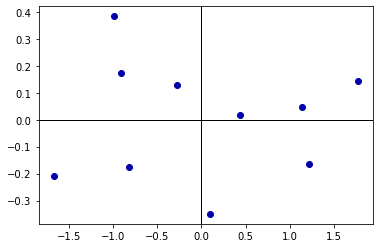

In [24]:
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.axhline(y=0, lw=1, color='k')
plt.axvline(x=0, lw=1, color='k')

Reconstituirea datelor se face avand in vedere ca matricea $eigenvectors$ este ortogonala (a se vedea assert-urile anterioare), deci $eigenvectors^{-1} = eigenvectors^t$:

In [25]:
recovered_data = projected_data @ eigenvectors.T
assert np.all(np.isclose(recovered_data, data))
recovered_data_with_mean_added = recovered_data + mu
assert np.all(np.isclose(recovered_data_with_mean_added, orig_data))

**6. (Optional) Se pastreaza doar o parte din dimensiunile (trasaturile) din noul sistem.**

Se observa ca datele de pe a doua axa (cea care are valoarea proprie asociata mai mica) au dispersie mai mica decat datele de pe a prima axa. Se poate renunta la ea, considerandu-se ca pierderea unor valori de variabilitate mica nu duce la pierdere prea mare de informatie:

In [26]:
first_eigenvector = eigenvectors[:, 0]

projected_data = data @ first_eigenvector

print(f'Date proiectate: {projected_data}')

Date proiectate: [-0.828  1.778 -0.992 -0.274 -1.676 -0.913  0.099  1.145  0.438  1.224]


In [27]:
# TODO: exprimarea noilor axe de coordonate ca si combinatie liniara de dimensiuni originare
# TODO: cat e pierderea de informatie - din cursul lui Andrew Ng
# TODO legatura cu SVD

## Exemplu de reprezentare cu PCA

O aplicare frecventa a PCA este pentru vizualizarea datelor cu multe dimensiuni. Vom folosi setul de date [breast cancer wisconsin dataset](http://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)), care are 30 de dimensiuni:

In [28]:
cancer = load_breast_cancer()
cancer.data.shape

(569, 30)

Am putea reprezenta 2d perechi de dimensiuni, dar ar rezulta $C_{30}^2$ grafice. Un set mai mic de reprezentari se obtine prin histograme, cate o histogama pe fiecare dimensiune, cu colorare diferita pe cazurile maligne si benigne:

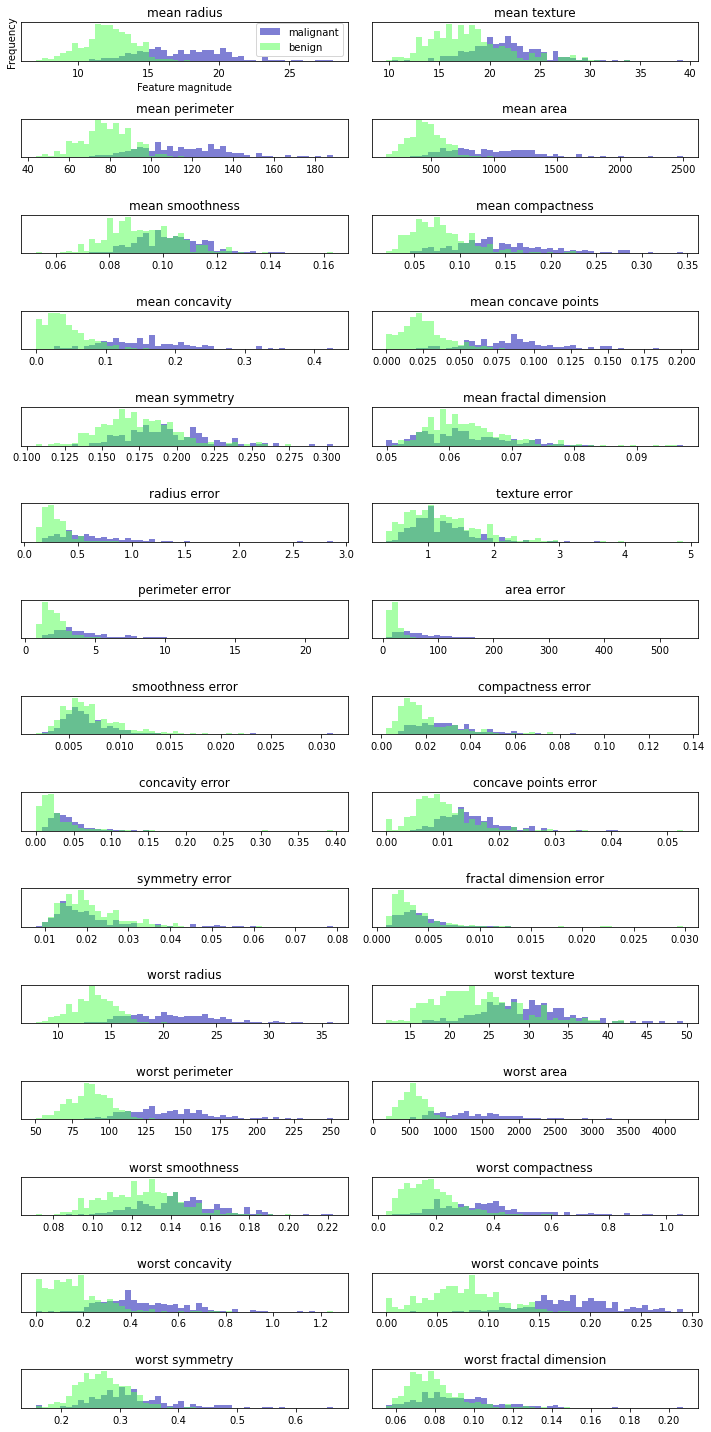

In [29]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel()

for i in range(30):
    _, bins = np.histogram(cancer.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

Observam ca unele dimensiuni sunt neinformative: de exemplu, la "smoothness error" cele doua histograme sunt in mare masura suprapuse, deci aceasta dimensiune nu permite discriminare buna. Alte dimensiuni - "worst concave points" - separa mai bine cele doua clase. 

In toate reprezentaile de mai sus dimensiunile nu sunt combinate, ci considerate in izolare. Am prefera sa prindem interactiunea intre variabile si modul in care acestea se leaga de clase. PCA permite obtinerea de combinatii liniare ale trasaturilor de origine. 

Din punct de vedere al utilizatrii, PCA se foloseste ca orice preprocesator: suporta apel de metoda `fit` pentru un set de antrenare si ulterior apel de `transform` pe orice set din spatiul initial.  

In [30]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data) # este suficienta doar centrarea datelor in origine, nu neaparat si standardizarea lor
X_scaled = scaler.transform(cancer.data)

In [31]:
from sklearn.decomposition import PCA
# patreaza primele doua componente principale ale datelor
pca = PCA(n_components=2) # implicit, PCA pastreaza toate dimensiunile initiale; aici vom folosi doua, pentru a putea face reprezenatre grafica

pca.fit(X_scaled)

# transforma datele pentru a pastra primele doua componente principale
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (569, 30)
Reduced shape: (569, 2)


Reprezentarea datelor proiectate prin PCA este:

Text(0, 0.5, 'Second principal component')

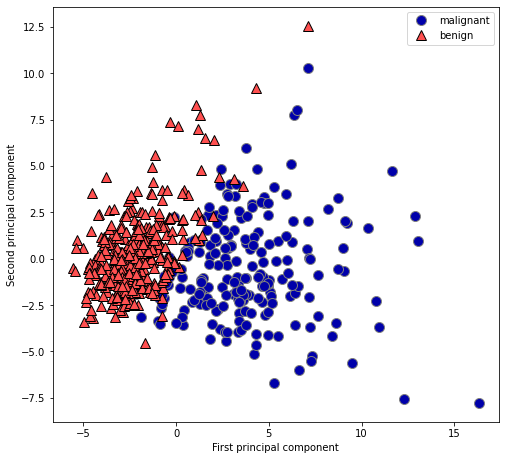

In [32]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

Trebuie subliniat ca PCA lucreaza nesupervizat, nefolosind in niciun fel informatia despre clasa niciunei inregistrari. Colorarea datelor in graficul de mai sus e facuta doar pentru a arata separarea buna a claselor obtinuta prin proiectia pe (doar) doua dimensiuni. 

Un dezavantaj al PCA este ca noile axe sunt combinatii liniare ale vechilor dimensiuni. De exemplu, prin PCA ca mai sus s-au obtinut doua axe, fiecare cu coeficienti de combinare liniara a dimensiunilor originare:

In [33]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


Prima linie este cea mai importanta componenta principala, a doua - urmatoarea ca importanta. Coeficientii de combinatie liniara pentru dimensiunile originare sunt:

In [34]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.219  0.104  0.228  0.221  0.143  0.239  0.258  0.261  0.138  0.064
   0.206  0.017  0.211  0.203  0.015  0.17   0.154  0.183  0.042  0.103
   0.228  0.104  0.237  0.225  0.128  0.21   0.229  0.251  0.123  0.132]
 [-0.234 -0.06  -0.215 -0.231  0.186  0.152  0.06  -0.035  0.19   0.367
  -0.106  0.09  -0.089 -0.152  0.204  0.233  0.197  0.13   0.184  0.28
  -0.22  -0.045 -0.2   -0.219  0.172  0.144  0.098 -0.008  0.142  0.275]]


Vizualizarea coeficientilor se poate face cu un heatmap:

Text(0, 0.5, 'Principal components')

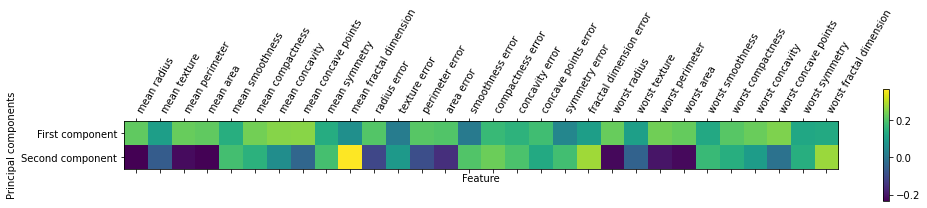

In [35]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),
           cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Exemplu: eigenfaces ("fețe principale")

O alta utilizare a PCA este extragerea de trasaturi: se spera ca prin aplicarea PCA se gasesc trasaturi care sunt mai informative decat cele initiale. Pentru seturi provevnind din spatii cu multe dimensiuni, acest lucru e adeseori adevarat. 

Vom folosi set de date "Labeled Faces in the Wild", fețe de persoane publice. Vom face PCA pentru a reduce dimensiunile si a gasi mai eficient cui apartine o figura data. 

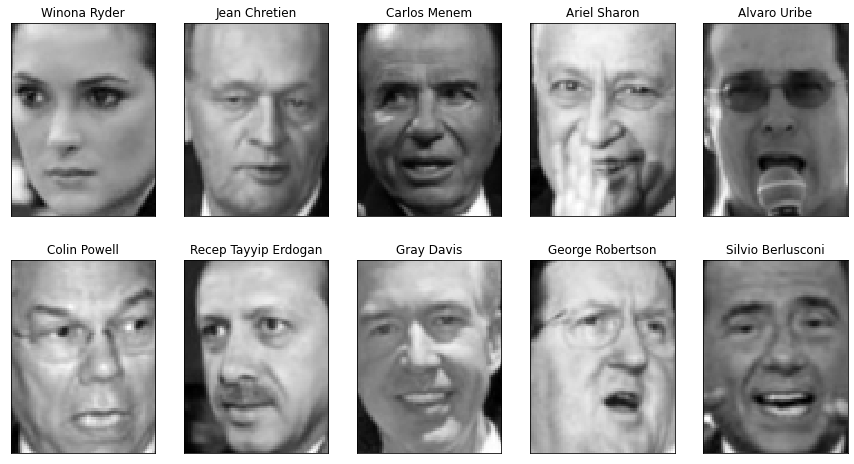

In [36]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [37]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [38]:
# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names:
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   
Andre Agassi               36   Angelina Jolie             20   Ariel Sharon               77   
Arnold Schwarzenegger      42   Atal Bihari Vajpayee       24   Bill Clinton               29   
Carlos Menem               21   Colin Powell              236   David Beckham              31   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   
Gerhard Schroeder         109   Gloria Macapagal Arroyo    44   Gray Davis                 26   
Guillermo Coria            30   Hamid Karzai               22   Hans Blix                  39   
Hugo Chavez                71   Igor Ivanov                20   Jack Straw                 28   
Jacques Chirac             52   Jean Chretien              55   Jennifer Aniston           21   
Jennifer Capriati          42   Jennifer Lopez             21   Jeremy Greenstock          24   
Jiang Zemin                20 

Unele persoane sunt cu numar mare de reprezentari fata de altele, vom utiliza doar maxim 50 de poze pentru fiecare persoana - altfel rezultatul PCA ar fi dominat de persoanele cu multe poze. 

In [39]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
    
X_people = people.data[mask]
y_people = people.target[mask]

# scacleaza valorile pentru a ajunge intre 0 si 1 in locul intervalului [0..255] initial
X_people = X_people / 255.

O cerinta frecvent intalnita este: dandu-se o poza de persoana, sa se determine cui ii apartine. O modalitate este construirea unui clasificator (MLP, CNN etc.), dar aici avem relativ multe clase (62) si putine poze pentru fiecare individ. Vom folosi un clasificator simplu, KNN, care cauta imaginea cea mai similara cu poza data. In prima faza, vom folosi KNN cu K=1 si distanta calculata luand in considerare toti pixelii:

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# imparte datele in set de antrenare si de testare
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)
# construieste un obiect KNeighborsClassifier cu un singul vecin:
knn = KNeighborsClassifier(n_neighbors=1, n_jobs=4)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.23


Un model de baza care ar propune cu probabilitate egala oricare din cele 62 de persoane ca raspuns la o poza de test ar avea rata de succes de 1/62 = 1.61%. Modelul curent are 23%, ceea ce e destul de bine. 

Folosirea unei metrici bazate pe toti pixelii este naiva: o simpla deplasare a persoanei in poza ar duce la diferente mari fata de poza originara. Speram ca folosind componente principale, prindem mai bine trasaturile unei poze iar distanta devine mai robusta. 

Vom folosi PCA cu optiune de *whitening*, ceea ce inseamna ca dimensiunile vor fi modificate sa aiba aceeasi scala; este echivalenta cu aplicarea unei operatii de scalare dupa obtinerea transformarii PCA:

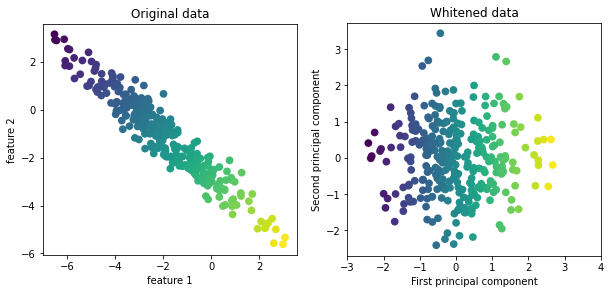

In [41]:
mglearn.plots.plot_pca_whitening()

Aplicam deci PCA cu whitening pe setul de antrenare:

In [42]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


... si apoi repetam cautarea pe setul de testare:

In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


Componentele obtinute prin PCA sunt 100 de vectori (axe), fiecare din ele fiind combinatie liniara a axelor initiale: 

In [44]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


Primele 15 componente principale sunt: 

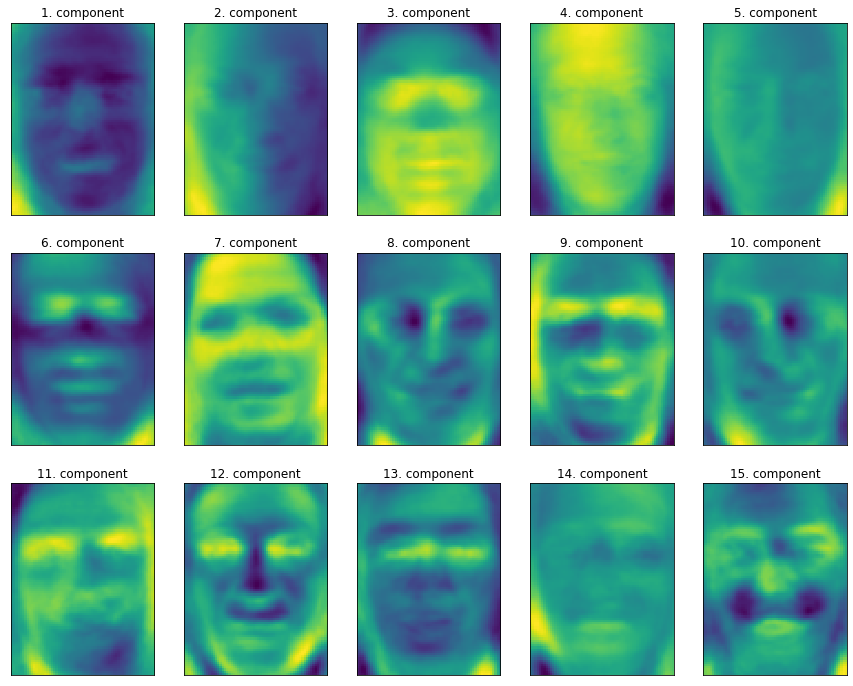

In [45]:
fig, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape),
              cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

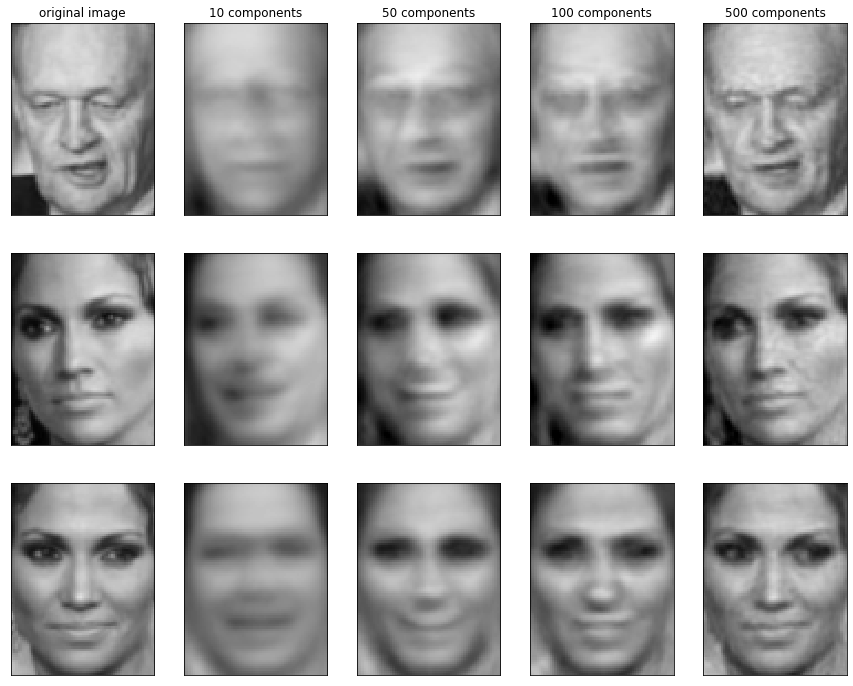

In [46]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

De ce se numesc "fete principale"? Fiecare figura poate fi descompusa ca o combinatie liniara a componentelor principale:

![eigenfaces](./images/eigenfaces.png)

unde $X_0$, $X_1$ etc. sunt coeficienti reali cu care se multiplica vectorii principali determinati de PCA. 